<h1> Smart India Hackathon 2022</h1>
<p><b>PSID:-</b> NR1099</p>
<p><b>Problem Statement:- </b>To automate and compute the detection of possible vulnerability to Depression before its onset</p>
<p> This problem is given by <b>National Institute for Empowerment of Persons with Multiple Disabilities (NIEPMD), Ministry of Social Justice & Empowerment.</b></p>
<p>*********************************************************************************************************************************************************************************************************</p>

## Importing all the libraries

In [1]:
# importing all the libraries
import os
import sys
import nibabel as nib
import nipype as nip
import dipy as dip
import numpy as np
import pandas as pd
import nilearn as nil
import matplotlib.pyplot as plt

print("All libraries imported..")

All libraries imported..


# Load alll the dataset

In [2]:
os.chdir('..')
print("Your are currently in the directory: ",os.getcwd())

Your are currently in the directory:  C:\Users\luhar\RSCAMVITM


#### Dont run this cell again and again

In [3]:
#load Data1 folder

meta_data={"MRI_path":[],"bvec_path":[],"bval_path":[],"labels":[]}

for folder in (os.listdir(path=r"C:\Users\luhar\RSCAMVITM\sihdata\Data1")):
    if (folder.startswith("sub")) and (not folder.endswith(".tar")) :
        str1="/".join(["C:/Users/luhar/RSCAMVITM/sihdata/Data1",folder,"ses-01","dwi"])
        for file in (os.listdir(path=str1)):
            if file.endswith(".nii.gz"):
                meta_data["MRI_path"].append("/".join(["C:/Users/luhar/RSCAMVITM/sihdata/Data1",folder,"ses-01","dwi",file]))
            if file.endswith(".bvec"):
                meta_data["bvec_path"].append("/".join(["C:/Users/luhar/RSCAMVITM/sihdata/Data1",folder,"ses-01","dwi",file]))
            if file.endswith(".bval"):
                meta_data["bval_path"].append("/".join(["C:/Users/luhar/RSCAMVITM/sihdata/Data1",folder,"ses-01","dwi",file]))
        if folder.startswith("sub-control"):
            meta_data["labels"].append(0)
        else:
            meta_data["labels"].append(1)
            
    else:
        continue
        
        
data=pd.DataFrame(data=meta_data)
data.to_csv("C:/Users/luhar/RSCAMVITM/sihdata/Data1/meta_data.csv",index=False)
print("Meta data location is:{}".format("C:/Users/luhar/RSCAMVITM/sihdata/Data1/meta_data.csv"))

Meta data location is:C:/Users/luhar/RSCAMVITM/sihdata/Data1/meta_data.csv


In [4]:
#load Data3 folder

meta_data={"MRI_path":[],"bvec_path":[],"bval_path":[],"labels":[],"mask":[]}

for folder in (os.listdir(path=r"C:\Users\luhar\RSCAMVITM\sihdata\Data3")):
    if (folder.startswith("sub")) :
        str1="/".join(["C:/Users/luhar/RSCAMVITM/sihdata/Data3",folder,"dwi"])
        for file in (os.listdir(path=str1)):
            if file.endswith("dwi.nii.gz"):
                meta_data["MRI_path"].append("/".join(["C:/Users/luhar/RSCAMVITM/sihdata/Data3",folder,"dwi",file]))
            if file.endswith(".bvec"):
                meta_data["bvec_path"].append("/".join(["C:/Users/luhar/RSCAMVITM/sihdata/Data3",folder,"dwi",file]))
            if file.endswith(".bval"):
                meta_data["bval_path"].append("/".join(["C:/Users/luhar/RSCAMVITM/sihdata/Data3",folder,"dwi",file]))
            if file.endswith("+aseg.nii.gz"):
                meta_data["labels"].append("/".join(["C:/Users/luhar/RSCAMVITM/sihdata/Data3",folder,"dwi",file]))
            if file.endswith("brainmask.nii.gz"):
                meta_data["mask"].append("/".join(["C:/Users/luhar/RSCAMVITM/sihdata/Data3",folder,"dwi",file]))
    else:
        continue
        
        
data=pd.DataFrame(data=meta_data)
data.to_csv("C:/Users/luhar/RSCAMVITM/sihdata/Data3/meta_data.csv",index=False)
print("Meta data location is:{}".format("C:/Users/luhar/RSCAMVITM/sihdata/Data3/meta_data.csv"))

Meta data location is:C:/Users/luhar/RSCAMVITM/sihdata/Data3/meta_data.csv


### Load the dataset

In [41]:
choice=int(input("Which dataset you want to use 1, 2,3"))
if choice==1:
    data=pd.read_csv("C:/Users/luhar/RSCAMVITM/sihdata/Data3/meta_data.csv")
elif choice==2:
    data=pd.read_csv("C:/Users/luhar/RSCAMVITM/sihdata/Data2/meta_data.csv")
elif choice==3:
    data=pd.read_csv("C:/Users/luhar/RSCAMVITM/sihdata/Data3/meta_data.csv")
else:
    print("Wrong input...Rerun the cell")
data= data.sample(frac = 1,random_state=88,ignore_index=True)
data

Which dataset you want to use 1, 2,33


,MRI_path,bvec_path,bval_path,labels,mask
0,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_023...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_023...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_023...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_023...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_023...
1,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_014...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_014...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_014...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_014...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_014...
2,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_015...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_015...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_015...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_015...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_015...
3,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_012...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_012...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_012...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_012...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_012...
4,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_004...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_004...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_004...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_004...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_004...
5,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_024...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_024...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_024...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_024...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_024...
6,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_007...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_007...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_007...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_007...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_007...
7,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_009...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_009...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_009...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_009...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_009...
8,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_010...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_010...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_010...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_010...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_010...
9,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_008...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_008...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_008...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_008...,C:/Users/luhar/RSCAMVITM/sihdata/Data3/sub_008...


# Step:- Preprocessing

In [42]:
#importing all the libraries to do preprocessing

from dipy.io.image import load_nifti
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
from dipy.reconst.dti import TensorModel,fractional_anisotropy,color_fa
from dipy.segment.mask import median_otsu


### Sample Data from csv file or DataFrame

In [43]:
dmri=data['MRI_path'][0]
fbvec=data['bvec_path'][0]
fbval=data['bval_path'][0]
label=data['labels'][0]
mask=data['mask'][0]

### Data from custom path 

In [44]:
data,affine,img = load_nifti(dmri,return_img = True)
print(img)
print("Dimension of each voxel is: ",img.header.get_zooms()[:3])

<class 'nibabel.nifti1.Nifti1Image'>
data shape (66, 108, 108, 850)
affine: 
[[-1.99865675e+00  2.03703721e-16  7.46445134e-02  6.11233521e+01]
 [ 1.19583301e-17  2.03703713e+00 -2.03703721e-16 -9.96432648e+01]
 [ 7.32874200e-02  0.00000000e+00  2.03566909e+00 -1.42934235e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  66 108 108 850   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         2.         2.0370371  2.0370371  3.6        1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      

In [47]:
data_label,affine_label,img_label = load_nifti(label,return_img = True)
print(img_label)
print("Dimension of each voxel is: ",img_label.header.get_zooms()[:3])

<class 'nibabel.nifti1.Nifti1Image'>
data shape (66, 108, 108)
affine: 
[[-1.99865675e+00  2.03703721e-16  7.46445134e-02  6.11233521e+01]
 [ 1.19583301e-17  2.03703713e+00 -2.03703721e-16 -9.96432648e+01]
 [ 7.32874200e-02  0.00000000e+00  2.03566909e+00 -1.42934235e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  66 108 108   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         2.         2.0370371  2.0370371  2.53       1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10


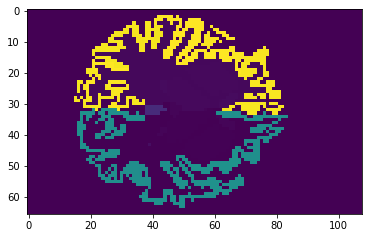

In [48]:
plt.imshow(data_label[:,:,60])
plt.show()

In [49]:
data_mask,affine_mask,img_mask = load_nifti(mask,return_img = True)
print(img_mask)
print("Dimension of each voxel is: ",img_mask.header.get_zooms()[:3])

<class 'nibabel.nifti1.Nifti1Image'>
data shape (66, 108, 108)
affine: 
[[-1.99865675e+00  2.03703721e-16  7.46445134e-02  6.11233521e+01]
 [ 1.19583301e-17  2.03703713e+00 -2.03703721e-16 -9.96432648e+01]
 [ 7.32874200e-02  0.00000000e+00  2.03566909e+00 -1.42934235e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  66 108 108   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         2.         2.0370371  2.0370371  3.6        1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
ca

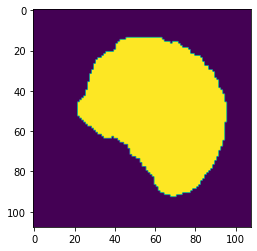

In [50]:
plt.imshow(data_mask[30,:,:])
plt.show()

In [51]:
from dipy.segment.mask import median_otsu,applymask

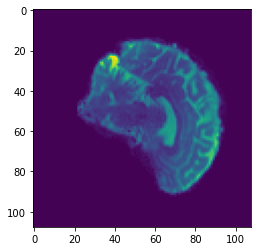

In [52]:
stripped_data=applymask(data,data_mask)
plt.imshow(stripped_data[30,:,:,0])
plt.show()

In [53]:
from dipy.core.gradients import gradient_table
from dipy.data import get_fnames
from dipy.io.gradients import read_bvals_bvecs
from dipy.io.image import load_nifti, load_nifti_data
from dipy.reconst.csdeconv import (ConstrainedSphericalDeconvModel,
                                   auto_response_ssst)
from dipy.tracking import utils
from dipy.tracking.local_tracking import LocalTracking
from dipy.tracking.streamline import Streamlines
from dipy.tracking.stopping_criterion import ThresholdStoppingCriterion
from dipy.viz import window, actor, colormap, has_fury

In [69]:
t1=r"C:\Users\luhar\RSCAMVITM\sihdata\Data3\sub_023\anat\sub_023_t1w.nii.gz"

In [70]:
t1_data = load_nifti_data(t1)
bvals, bvecs = read_bvals_bvecs(fbval,fbvec)
gtab = gradient_table(bvals, bvecs)

In [86]:
from scipy.ndimage.morphology import binary_dilation
from dipy.reconst import shm
from dipy.tracking import utils
from dipy.direction import peaks
white_matter = binary_dilation((data_label == 2) | (data_label == 7 ) | (data_label==41) | (data_label==46))
csamodel = shm.CsaOdfModel(gtab, 6)
csapeaks = peaks.peaks_from_model(model=csamodel,
                                  data=data,
                                  sphere=peaks.default_sphere,
                                  relative_peak_threshold=.8,
                                  min_separation_angle=45,
                                  mask=white_matter)

In [93]:
from dipy.tracking.local_tracking import LocalTracking
from dipy.tracking.stopping_criterion import BinaryStoppingCriterion
from dipy.tracking.streamline import Streamlines

affine = np.eye(4)
seeds = utils.seeds_from_mask(white_matter, affine, density=1)
stopping_criterion = BinaryStoppingCriterion(white_matter)

streamline_generator = LocalTracking(csapeaks, stopping_criterion, seeds,
                                     affine=affine, step_size=0.5)
streamlines = Streamlines(streamline_generator)

In [94]:
cc_slice = (data_label == 17) | (data_label==53)
cc_streamlines = utils.target(streamlines, affine, cc_slice)
cc_streamlines = Streamlines(cc_streamlines)

other_streamlines = utils.target(streamlines, affine, cc_slice,
                                 include=False)
other_streamlines = Streamlines(other_streamlines)
assert len(other_streamlines) + len(cc_streamlines) == len(streamlines)

140551

In [99]:
M, grouping = utils.connectivity_matrix(cc_streamlines, affine,
                                        data_label.astype(np.uint8),
                                        return_mapping=True,
                                        mapping_as_streamlines=True)

In [101]:
M[:3, :] = 0
M[:, :3] = 0

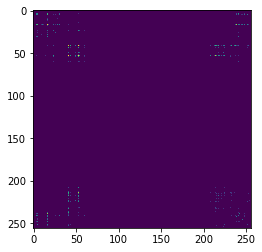

In [102]:
plt.imshow(np.log1p(M), interpolation='nearest')


In [105]:
from dipy.tracking.utils import density_map,target
tract_density=density_map(streamlines,affine,vol_dims=(66,108,108))

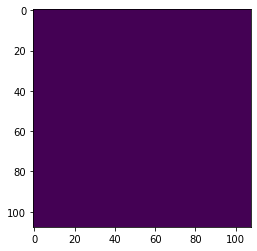

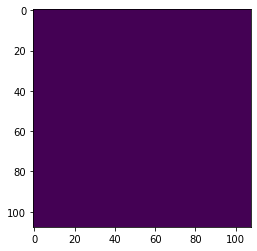

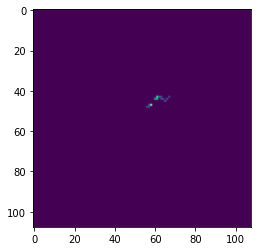

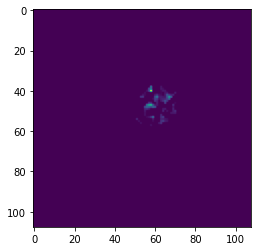

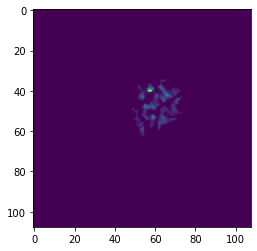

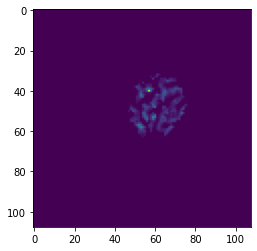

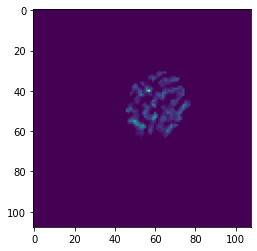

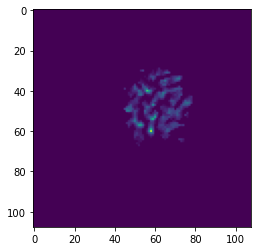

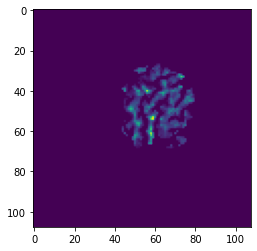

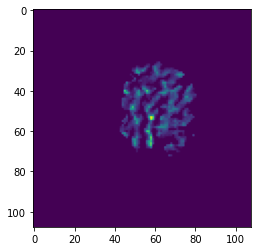

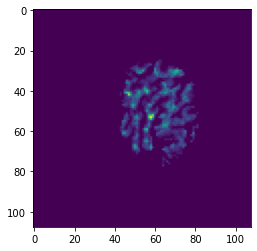

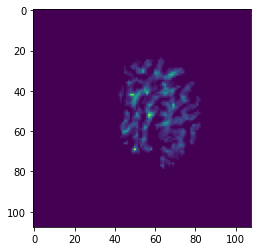

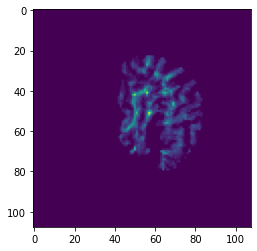

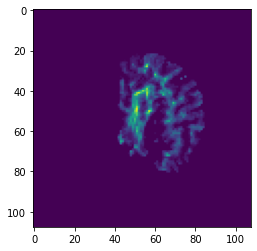

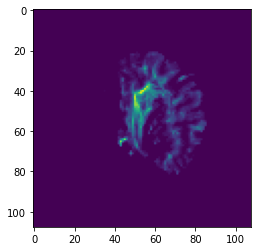

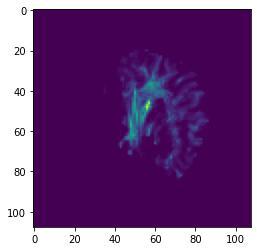

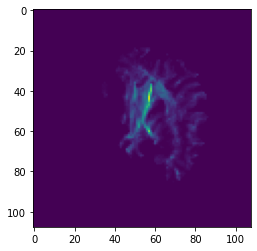

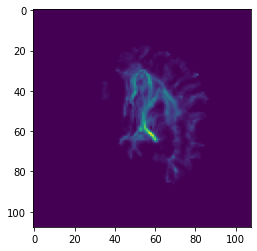

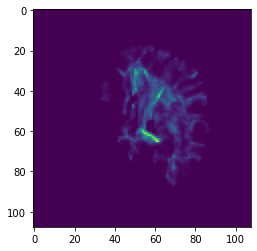

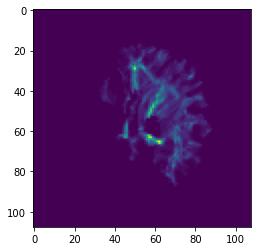

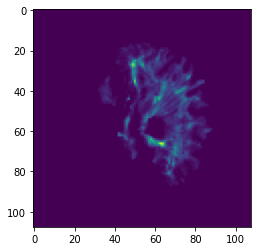

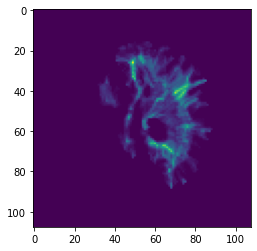

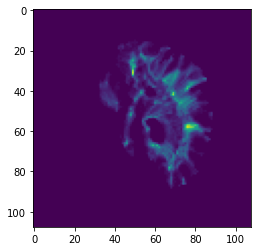

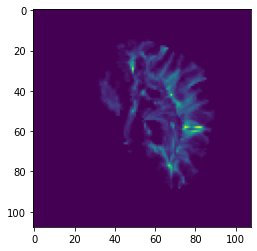

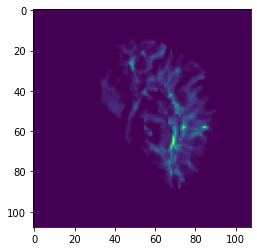

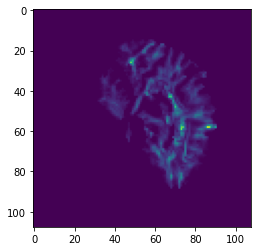

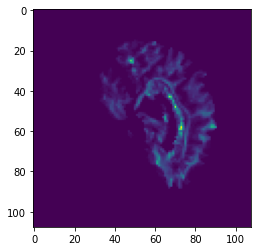

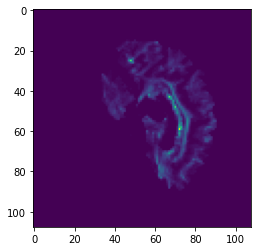

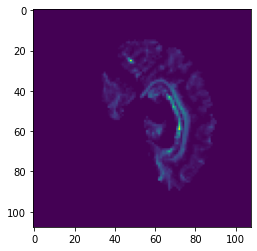

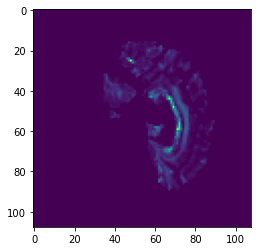

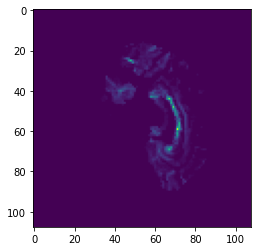

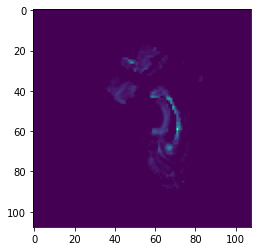

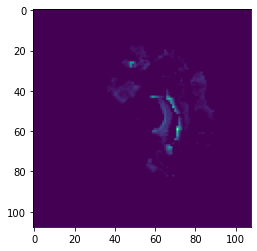

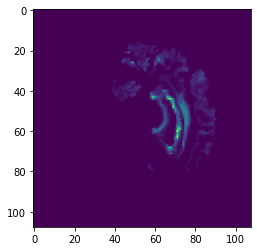

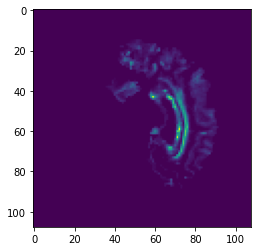

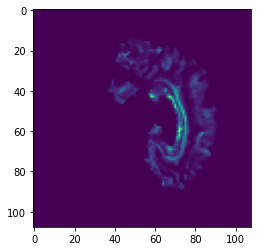

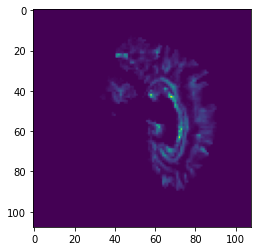

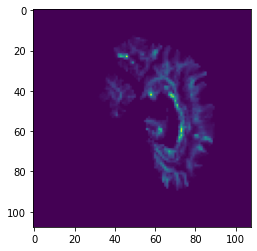

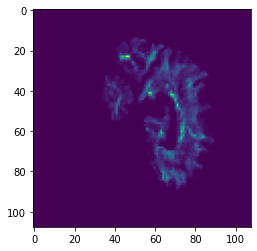

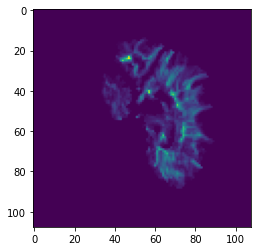

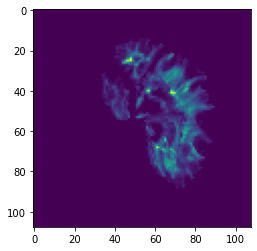

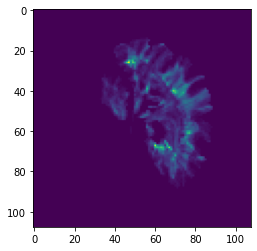

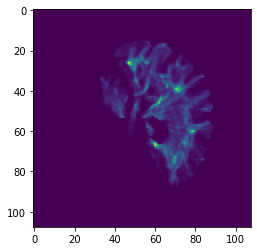

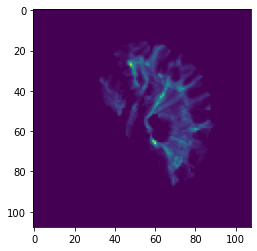

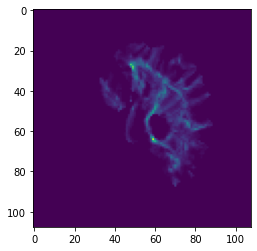

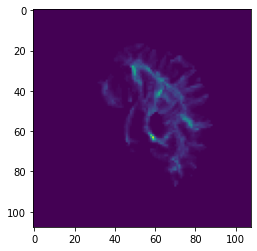

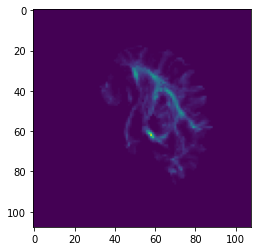

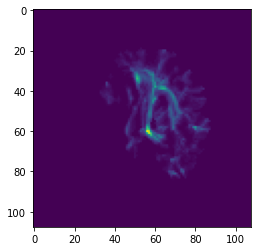

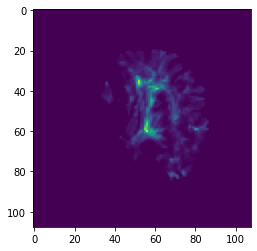

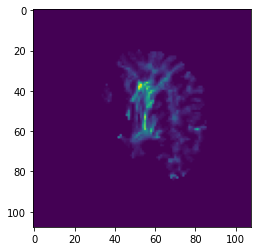

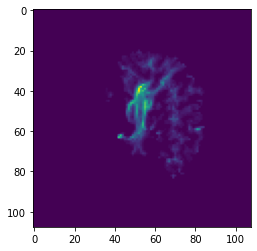

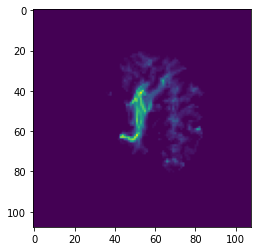

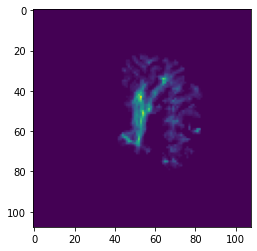

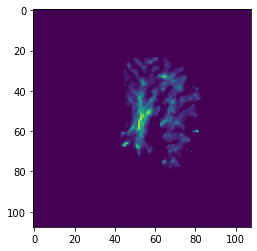

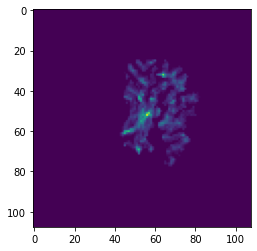

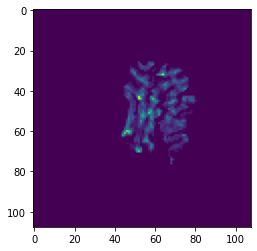

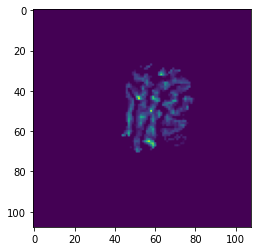

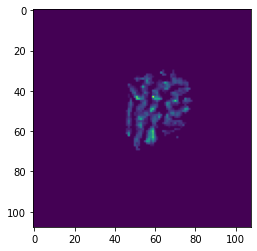

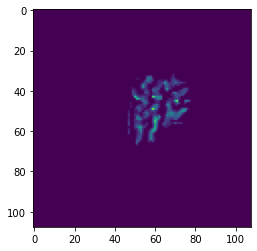

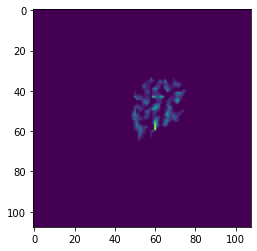

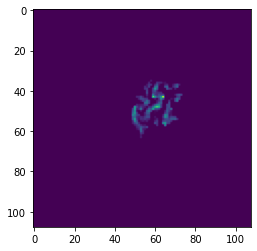

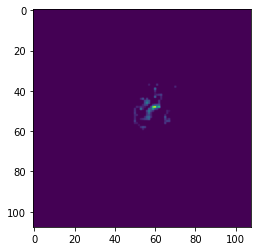

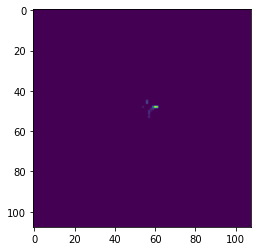

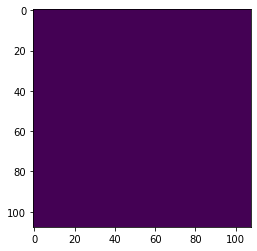

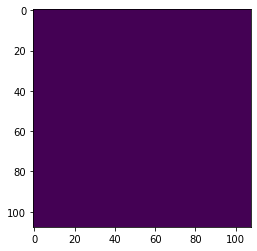

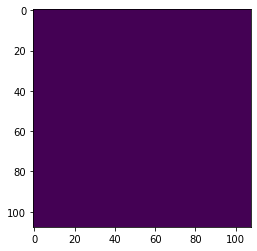

In [108]:
for i in range(66):
    plt.imshow(tract_density[i,:,:])
    plt.show()

In [80]:


bvals, bvecs = read_bvals_bvecs(fbval, fbvec)
gtab = gradient_table(bvals, bvecs)

seed_mask = (data_label == 17)
white_matter = (data_label == 2) | (data_label == 7 ) | (data_label==41) | (data_label==46)
# seeds = utils.seeds_from_mask(seed_mask, affine, density=1,)

# response, ratio = auto_response_ssst(gtab, data, roi_radii=10, fa_thr=0.7)
# csd_model = ConstrainedSphericalDeconvModel(gtab, response, sh_order=6,)
# csd_fit = csd_model.fit(data, mask=white_matter)

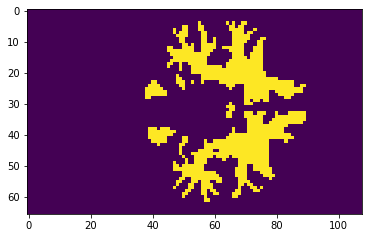

In [63]:
from dipy.reconst.shm import CsaOdfModel

csa_model = CsaOdfModel(gtab, sh_order=6)
gfa = csa_model.fit(data, mask=white_matter).gfa
stopping_criterion = ThresholdStoppingCriterion(gfa, .25)

In [65]:
from dipy.direction import ProbabilisticDirectionGetter
from dipy.data import small_sphere
from dipy.io.stateful_tractogram import Space, StatefulTractogram
from dipy.io.streamline import save_trk

fod = csd_fit.odf(small_sphere)
pmf = fod.clip(min=0)
prob_dg = ProbabilisticDirectionGetter.from_pmf(pmf, max_angle=30.,
                                                sphere=small_sphere)
streamline_generator = LocalTracking(prob_dg, stopping_criterion, seeds,
                                     affine, step_size=.5)
streamlines = Streamlines(streamline_generator)
sft = StatefulTractogram(streamlines, hardi_img, Space.RASMM)
save_trk(sft, "tractogram_probabilistic_dg_pmf.trk")

if has_fury:
    scene = window.Scene()
    scene.add(actor.line(streamlines, colormap.line_colors(streamlines)))
    window.record(scene, out_path='tractogram_probabilistic_dg_pmf.png',
                  size=(800, 800))
    if interactive:
        window.show(scene)

In [66]:
streamlines

ArraySequence([array([[ -8.72149945, -12.050668  , -28.26080022]]), array([[-10.7201562, -12.050668 , -28.1875128]]), array([[-10.64551169, -12.050668  , -26.15184371]]), array([[-10.79480071, -10.01363087, -30.22318189]]), array([[-10.7201562 , -10.01363087, -28.1875128 ]]), array([[-10.86944523,  -7.97659373, -32.25885098]]), array([[-10.86944523,  -5.9395566 , -32.25885098]]), array([[-11.01873425,  20.54192615, -36.33018915]]), array([[-10.94408974,  20.54192615, -34.29452007]]), array([[-11.01873425,  22.57896328, -36.33018915]]), array([[-10.94408974,  22.57896328, -34.29452007]]), array([[-12.71881295, -12.050668  , -28.11422538]]), array([[-12.64416844, -12.050668  , -26.07855629]]), array([[-12.79345746, -10.01363087, -30.14989447]]), array([[-12.86810198,  -5.9395566 , -32.18556356]]), array([[-12.94274649,  -3.90251946, -34.22123265]]), array([[-13.017391  ,  18.50488901, -36.25690173]]), array([[-12.94274649,  18.50488901, -34.22123265]]), array([[-12.86810198,  18.50488901

In [72]:
data_label=np.array(data_label,dtype='int')
np.unique(data_label)

array([   0,    2,    3,    4,    5,    7,    8,   10,   11,   12,   13,
         14,   15,   16,   17,   18,   24,   26,   28,   30,   31,   41,
         43,   44,   46,   47,   49,   50,   51,   52,   53,   54,   58,
         60,   62,   63,   77,   85,  251,  252,  253,  254,  255, 1000,
       1001, 1002, 1003, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 2000, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035])

In [ ]:
# Showing the middle axial slice without (left) and with (right) diffusion weighting.
axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 6].T,  origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 15].T, origin='lower')
plt.show()

In [54]:
np.unique(data)

array([0, 1], dtype=int16)

<font color='blue'>Here We can see that skull and other useless part is also there with Brain. So now we will do the skull stripping</font>

In [53]:
a=np.multiply(data,data_mask)
np.unique(a)

array([0, 1], dtype=int16)

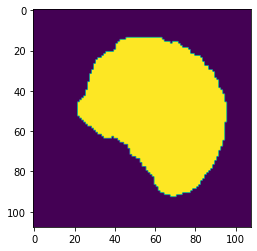

In [49]:
plt.imshow(a[30,:,:])
plt.show()

In [37]:
mask,S0_mask = median_otsu(data[:,:,:,0],median_radius=4,numpass=4)
print(mask.shape)
print(S0_mask.shape)

(66, 108, 108)
(66, 108, 108)


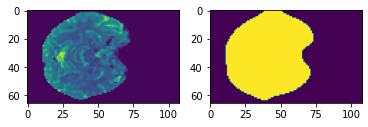

In [16]:
fig,ax=plt.subplots(1,2)
show(mask[:,:,60],ax[0])
show(S0_mask[:,:,60],ax[1])


<font color='red'>Learn more about the parameters in the median_otsu</font>

In [17]:
# calculation of gradient table from the bval and bvec
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)
gtab = gradient_table(bvals, bvecs)


#information about gradient table (Uncomment it if you want to see)
#***********************CODE START**************************************
# print(gtab)
# print("Gradients are:\n",gtab.gradients)
#***********************CODE END****************************************


# part of the data is the S0 volumes (volumes which correspond to b-values of 0).
#***********************CODE START**************************************
# S0s = data[:, :, :, gtab.b0s_mask]
# S0s.shape
#***********************CODE END****************************************

In [18]:
ten_model = TensorModel(gtab)
ten_fit = ten_model.fit(data, mask)
fa = fractional_anisotropy(ten_fit.evals)
cfa = color_fa(fa,ten_fit.evecs)

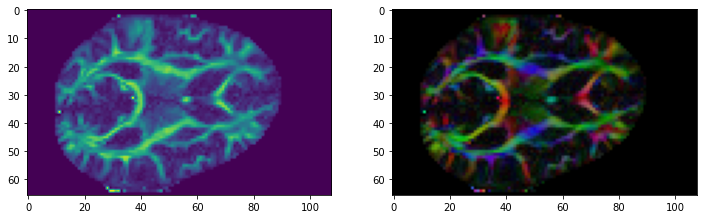

In [20]:
# plottting of FA and its color mapping
fig,ax=plt.subplots(1,2,figsize=(12,12))
show(fa[:,:,70],ax[0])
show(cfa[:,:,70],ax[1])

# Tractography Performed

In [21]:
import nibabel as nib
import numpy as np
from dipy.core.gradients import gradient_table
from dipy.data import get_fnames
from dipy.io.gradients import read_bvals_bvecs
from dipy.io.image import load_nifti#, load_nifti_data
from dipy.tracking.utils import random_seeds_from_mask
from dipy.segment.mask import median_otsu
from dipy.reconst.csdeconv import ConstrainedSphericalDeconvModel,auto_response_ssst
from dipy.reconst.shm import CsaOdfModel
from dipy.data import default_sphere
from dipy.direction import peaks_from_model
from dipy.tracking.stopping_criterion import ThresholdStoppingCriterion,CmcStoppingCriterion
from dipy.tracking.local_tracking import LocalTracking
from dipy.tracking.streamline import Streamlines
from dipy.io.stateful_tractogram import Space, StatefulTractogram
from dipy.io.streamline import save_trk,load_trk
from dipy.tracking import utils

In [22]:
# seeds can be changes to white tracts labels
seeds = random_seeds_from_mask(mask, affine, seeds_count=1)
response, ratio = auto_response_ssst(gtab, data, roi_radii=10, fa_thr=0.7)
csa_model = CsaOdfModel(gtab, sh_order=6)
csa_peaks = peaks_from_model(csa_model, data, default_sphere,
                             relative_peak_threshold=.5,
                             min_separation_angle=25,
                             mask=mask)

In [ ]:
# Chose traditional FA stopping criteria  
stopping_criterion = ThresholdStoppingCriterion(csa_peaks.gfa, .2)
# Initialization of LocalTracking. The computation happens in the next step.
streamlines_generator = LocalTracking(csa_peaks, stopping_criterion,  seeds=seeds, affine=affine, step_size=.5)
# Generate streamlines object
streamlines = Streamlines(streamlines_generator)

In [ ]:
sft = StatefulTractogram(streamlines, img, Space.RASMM)
save_trk(sft, "tractogram_probabilistic_dg_sh_pfm.trk",)

In [ ]:
from dipy.viz import window, actor, colormap, has_fury
interactive=False
if has_fury:
    scene = window.Scene()
    scene.add(actor.line(streamlines, colormap.line_colors(streamlines)))
    window.record(scene, out_path='tractogram_probabilistic_dg_sh_pfm.png',
                  size=(1000, 1000))
    if not interactive:
        window.show(scene)

In [107]:
from dipy.tracking.utils import density_map,target
tract_density=density_map(streamlines,affine,vol_dims=(128, 128, 50))

In [106]:
np.unique(tract_density)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
plt.imshow(tract_density[:,:,15])
plt.show()

In [110]:
tract_density[:,:,30]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [103]:
plt.imshow(tract_density[])

(128, 128, 50)

In [ ]:
streamlines_v=[]
for i in streamlines:
    if (len(i)==1):
        continue
    else:
        streamlines_v.append(i)

In [ ]:
M, grouping = utils.connectivity_matrix(streamlines_v, affine,
                                        S0_mask.astype(np.uint8),
                                        return_mapping=True,
                                        mapping_as_streamlines=True)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.log1p(M), interpolation='nearest')
plt.savefig("connectivity.png")


In [ ]:
a=load_trk("bvjgbmhmhv.trk",img, Space.RASMM)

In [ ]:
from dipy.viz import window, actor, colormap, has_fury
interactive=False
if has_fury:
    scene = window.Scene()
    scene.add(actor.line(s, colormap.line_colors(s)))
    window.record(scene, out_path='tractogram_probabilistic_dg_sh_pfm.png',
                  size=(1000, 1000))
    if not interactive:
        window.show(scene)

In [100]:
affine

array([[-1.99344909e+00, -1.57130316e-01,  5.75289428e-02,
         1.36798950e+02],
       [-1.57191932e-01,  1.99381232e+00, -2.57173413e-03,
        -1.13438484e+02],
       [ 3.80993299e-02,  4.72324248e-03,  2.99944305e+00,
        -9.64339752e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])